# Pathlib Documentation : 

https://realpython.com/python-pathlib/

tutorial : https://www.youtube.com/watch?v=m2hRcRV-kSE

- __pathlib works accross all operating systems (Windows uses \ while Mac and Linux use / as a separator)__


- __pathlib treats file paths as objects__

## Types of Path in Windows

In Windows operating systems, a path is a unique identifier for the location of a file or folder in the file system. Paths are used to navigate and access files and directories. There are two main types of paths in Windows:

1. **Absolute Path:**
   - An absolute path provides the complete location of a file or folder from the root directory (the top-level directory in the file system).
   - It includes the drive letter (for example, C:), the folders, and the file name.
   - Example: `C:\Users\Username\Documents\File.txt`



2. **Relative Path:**
   - A relative path specifies the location of a file or folder in relation to the current working directory or another file.
   - It doesn't include the complete path from the root directory; instead, it describes the location relative to a starting point.
   - Relative paths are often used in scripting and programming to create more flexible and portable code.
   - Example: `..\Folder\AnotherFile.txt` (moves up one level and then accesses the "Folder" directory and a file within it)

Paths may use backslashes `\` or forward slashes `/` as directory separators. While Windows generally uses backslashes in paths, many Windows APIs and applications also accept forward slashes.


#### Importing the main class:

In [1]:
from pathlib import Path

### Create a new path

In [7]:
new_path = Path('D:/Python/5. pathlib')/'New_folder'/'item.txt'
new_path

WindowsPath('D:/Python/5. pathlib/New_folder/item.txt')

#### OR

In [8]:
new_path = Path.cwd()/'New_folder'/'item.txt'
new_path

WindowsPath('D:/Python/5. pathlib/New_folder/item.txt')

###  as\_posix() : 

when you need to use the path as a string and want to ensure that it uses the POSIX path separator ("/") even on non-POSIX systems (such as Windows), you can use the .as_posix() method.


This can be particularly useful in scenarios where you want to generate paths in a format that is consistent across different operating systems, for example, when working with file paths in URLs or other contexts where POSIX-style separators are expected.

In [14]:
from pathlib import Path

# Create a Path object
path_object = Path("path/to/some/file.txt")

# Convert the Path object to a string using POSIX-style separators
path_as_string = path_object.as_posix()

print("without posix -->",path_object)
print()
print("with posix -->",path_as_string)

without posix --> path\to\some\file.txt

with posix --> path/to/some/file.txt


In [9]:
new_path.as_posix()

'D:/Python/5. pathlib/New_folder/item.txt'

### check if new path exists or not:

In [180]:
new_path.exists()

False

### Get home directory

In [2]:
home_dir = Path.home()
home_dir

WindowsPath('C:/Users/Asus')

### Get path of current working directory

In [159]:
curr_dir = Path.cwd()
curr_dir

WindowsPath('D:/Python/5. pathlib')

In [160]:
curr_dir.parts

('D:\\', 'Python', '5. pathlib')

In [161]:
Path.cwd().parts

('D:\\', 'Python', '5. pathlib')

### Get the path to the current Python file (does not work in Jupyter Notebooks)

In [4]:
curr_file = Path(__file__)
curr_file

NameError: name '__file__' is not defined

### Get first parent folder path

In [5]:
one_above = Path.cwd().parent
one_above

WindowsPath('D:/Python')

#### OR

In [6]:
one_above = Path.cwd().parents[0]
one_above

WindowsPath('D:/Python')

### Get second parent folder path

In [7]:
second_above = Path.cwd().parent.parent
second_above

WindowsPath('D:/')

In [8]:
second_above = Path.cwd().parents[1]
second_above

WindowsPath('D:/')

### Join paths

- path / "foldername"

In [9]:
joined_path = Path.joinpath(Path.cwd() / 'Output')
joined_path

WindowsPath('D:/Python/5. pathlib/Output')

#### OR

In [55]:
for file_path in Path.cwd().glob("*.txt"):
    new_path = Path("archive") / file_path.name
    print(new_path)

archive\100_Python_Problems.txt
archive\ex15_sample.txt
archive\sample.txt
archive\sample2.txt


### Create a directory if it does not exist  $\longrightarrow$ create a folder

> exist_ok: to ignore 'FileExistsError' if the target directory already exists

In [10]:
joined_path.mkdir(exist_ok=True)

### Empty Folder inside Empty folder  --> Parents = True 

In [ ]:
joined_path = Path.joinpath(Path.cwd() / 'data'/'raw')

joined_path.mkdir(parents=True,exist_ok=True)

### Check if the path is a folder

In [11]:
joined_path

WindowsPath('D:/Python/5. pathlib/Output')

In [12]:
joined_path.is_dir()

True

### Check if the path is a file

In [13]:
Path.cwd()

WindowsPath('D:/Python/5. pathlib')

In [14]:
joined_path.is_file()

False

In [19]:
print(Path.cwd() / "Pathlib_Cheat_Sheet.pdf")

Path.cwd() / "Pathlib_Cheat_Sheet.pdf"

D:\Python\5. pathlib\Pathlib_Cheat_Sheet.pdf


WindowsPath('D:/Python/5. pathlib/Pathlib_Cheat_Sheet.pdf')

##### check if  "Pathlib_Cheat_Sheet" is a fie or not

In [18]:
example_file = Path.cwd() / "Pathlib_Cheat_Sheet.pdf"
example_file.is_file()

True

## Picking Out Components of a Path


A file or directory path consists of different parts. When you use pathlib, these parts are conveniently available as properties. Basic examples include:

- __.name :__ The filename without any directory


- __.stem :__ The filename without the file extension


- __.suffix :__ The file extension


- __.anchor :__ The part of the path before the directories


- __.parent :__ The directory containing the file, or the parent directory if the path is a directory

### extract filename:

In [20]:
example_file.name

'Pathlib_Cheat_Sheet.pdf'

In [21]:
example_file.parent

WindowsPath('D:/Python/5. pathlib')

#### Note:  .parent returns a new Path object, whereas the other properties return strings. This means, for instance, that you can chain .parent

### get filename without extension

In [22]:
example_file.stem

'Pathlib_Cheat_Sheet'

### get the file extension

In [23]:
example_file.suffix

'.pdf'

### get path before the directories

In [24]:
example_file.anchor

'D:\\'

### iterate over files in a current directory $\longrightarrow$ iter_dir()

In [25]:
curr_dir

WindowsPath('D:/Python/5. pathlib')

In [26]:
new_dir = curr_dir.parent
new_dir

WindowsPath('D:/Python')

In [27]:
for file in new_dir.iterdir():
    print(file)

D:\Python\.ipynb_checkpoints
D:\Python\1. PythonBasics_CampusX.ipynb
D:\Python\100 Python Practice Problems.docx
D:\Python\100_Python_Problems.txt
D:\Python\2. Function_OOP_CampusX_PythonNotes.ipynb
D:\Python\3. ExceptionHandling_Decorators_Namespace_CampusX.ipynb
D:\Python\4. File Handling
D:\Python\5. pathlib
D:\Python\abrakadabra
D:\Python\alakazam
D:\Python\CampusX_Python Interview Question Compiled.docx
D:\Python\campusX_python_practice_problems.ipynb
D:\Python\Campus_X_Python_Practice_Problems.docx
D:\Python\Corey schafer.ipynb
D:\Python\ex15_sample.txt
D:\Python\exception handling.ipynb
D:\Python\sample.txt
D:\Python\sample2.txt
D:\Python\TASK_Functions_OOP_CampusX.ipynb
D:\Python\TASK_PythonBasics_CampusX.ipynb
D:\Python\test_calc.py
D:\Python\Untitled-1.py


### iterate over files in a specific directory

In [31]:
specific_dir = new_dir / '4. File Handling'
specific_dir

WindowsPath('D:/Python/4. File Handling')

In [32]:
for file in specific_dir.iterdir():
    print(file)

D:\Python\4. File Handling\.ipynb_checkpoints
D:\Python\4. File Handling\big.txt
D:\Python\4. File Handling\cop_of_a_file.png
D:\Python\4. File Handling\demo.json
D:\Python\4. File Handling\demo1.json
D:\Python\4. File Handling\demo2.json
D:\Python\4. File Handling\demo4.json
D:\Python\4. File Handling\demo5.json
D:\Python\4. File Handling\FileHandling_Serialization&Deserialization_Recursion_CampusX.ipynb
D:\Python\4. File Handling\lags12.jpg
D:\Python\4. File Handling\person.pkl
D:\Python\4. File Handling\sample.txt
D:\Python\4. File Handling\sample1.txt
D:\Python\4. File Handling\sample2.txt
D:\Python\4. File Handling\Task_Filehandling.ipynb
D:\Python\4. File Handling\yoyo.txt


### iterate over sub-folders too: $\longrightarrow$ rglob("*")

In [35]:
new_dir

WindowsPath('D:/Python')

In [34]:
for file in new_dir.rglob("*"):
    print(file)

D:\Python\.ipynb_checkpoints
D:\Python\1. PythonBasics_CampusX.ipynb
D:\Python\100 Python Practice Problems.docx
D:\Python\100_Python_Problems.txt
D:\Python\2. Function_OOP_CampusX_PythonNotes.ipynb
D:\Python\3. ExceptionHandling_Decorators_Namespace_CampusX.ipynb
D:\Python\4. File Handling
D:\Python\5. pathlib
D:\Python\abrakadabra
D:\Python\alakazam
D:\Python\CampusX_Python Interview Question Compiled.docx
D:\Python\campusX_python_practice_problems.ipynb
D:\Python\Campus_X_Python_Practice_Problems.docx
D:\Python\Corey schafer.ipynb
D:\Python\ex15_sample.txt
D:\Python\exception handling.ipynb
D:\Python\sample.txt
D:\Python\sample2.txt
D:\Python\TASK_Functions_OOP_CampusX.ipynb
D:\Python\TASK_PythonBasics_CampusX.ipynb
D:\Python\test_calc.py
D:\Python\Untitled-1.py
D:\Python\.ipynb_checkpoints\1. PythonBasics_CampusX-checkpoint.ipynb
D:\Python\.ipynb_checkpoints\2. Function_OOP_CampusX_PythonNotes-checkpoint.ipynb
D:\Python\.ipynb_checkpoints\3. ExceptionHandling_Decorators_Namespace_C

### iterate over files in a directory with specific extension

##### print name of python files:

In [36]:
for file in new_dir.iterdir():
    if file.suffix == '.ipynb':
        print(file)

D:\Python\1. PythonBasics_CampusX.ipynb
D:\Python\2. Function_OOP_CampusX_PythonNotes.ipynb
D:\Python\3. ExceptionHandling_Decorators_Namespace_CampusX.ipynb
D:\Python\campusX_python_practice_problems.ipynb
D:\Python\Corey schafer.ipynb
D:\Python\exception handling.ipynb
D:\Python\TASK_Functions_OOP_CampusX.ipynb
D:\Python\TASK_PythonBasics_CampusX.ipynb


##### print name of txt files:

In [37]:
for file in new_dir.iterdir():
    if file.suffix == '.txt':
        print(file)

D:\Python\100_Python_Problems.txt
D:\Python\ex15_sample.txt
D:\Python\sample.txt
D:\Python\sample2.txt


### changing path into correct form : 

In [38]:
>>> from pathlib import Path
>>> Path(r"C:\Users\philipp\realpython\file.txt")

WindowsPath('C:/Users/philipp/realpython/file.txt')

## Find path of a file $\longrightarrow$ .resolve()

> gives absolute path

In [187]:
path_of_file = Path("shopping_list.md")
print(path_of_file)

print(path_of_file.resolve())

shopping_list.md
D:\Python\5. pathlib\shopping_list.md


## Reading Files

In [ ]:
from pathlib import Path

In [54]:
path = Path.cwd() / "shopping_list.md"
path

WindowsPath('D:/Python/5. pathlib/shopping_list.md')

In [55]:
content = path.read_text(encoding="utf-8")

groceries = [line for line in content.splitlines() if line.startswith("*")]
print("\n".join(groceries))

* Banana
* Apple
* Peach
* Chocolate
* Nougat Bits


#### OR

In [39]:
from pathlib import Path

In [40]:
path = Path.cwd()/'shopping_list.md'
path

WindowsPath('D:/Python/5. pathlib/shopping_list.md')

In [50]:
with path.open(mode='r', encoding='utf-8') as md_file:
    content = md_file.read()
    groceries = [line for line in content.splitlines() if line.startswith("*")]
    print(groceries)
    print()
    print("\n".join(groceries))

['* Banana', '* Apple', '* Peach', '* Chocolate', '* Nougat Bits']

* Banana
* Apple
* Peach
* Chocolate
* Nougat Bits


### Short version to read file :

In [184]:
path = Path.cwd()/'shopping_list.md'
print(path.read_text())

<!-- shopping_list.md -->

# Shopping List

## Fruit

* Banana
* Apple
* Peach

## Candy

* Chocolate
* Nougat Bits


## pathlib offers some convenient methods to read and write files:

- __.read_text()__ opens the path in text mode and returns the contents as a string.


- __.read_bytes()__ opens the path in binary mode and returns the contents as a byte string.


- __.write_text()__ opens the path and writes string data to it.


- __.write_bytes()__ opens the path in binary mode and writes data to it.


__NOTE : Each of these methods handles the opening and closing of the file.__


1. **`.read_text()`:**
   - Opens the path in text mode and returns the contents as a string.

```python
from pathlib import Path

# Create a Path object
file_path = Path("example.txt")

# Write some text to the file
file_path.write_text("Hello, this is an example text file.")

# Read the contents of the file as a string
file_contents = file_path.read_text()

# Print the contents
print(file_contents)
```

2. **`.read_bytes()`:**
   - Opens the path in binary mode and returns the contents as a byte string.

```python
from pathlib import Path

# Create a Path object
binary_file_path = Path("example.bin")

# Write some binary data to the file
binary_data = b'\x48\x65\x6C\x6C\x6F'  # Hello in ASCII
binary_file_path.write_bytes(binary_data)

# Read the contents of the file as bytes
file_contents_bytes = binary_file_path.read_bytes()

# Print the contents
print(file_contents_bytes)
```

3. **`.write_text()`:**
   - Opens the path and writes string data to it.

```python
from pathlib import Path

# Create a Path object
text_file_path = Path("example_write.txt")

# Write text to the file
text_file_path.write_text("This text will be written to the file.")

# Check the contents of the file
print(text_file_path.read_text())
```

4. **`.write_bytes()`:**
   - Opens the path in binary mode and writes data to it.

```python
from pathlib import Path

# Create a Path object
binary_file_path_write = Path("example_write.bin")

# Write binary data to the file
binary_data_to_write = b'\x41\x42\x43\x44'  # ABCD in ASCII
binary_file_path_write.write_bytes(binary_data_to_write)

# Check the contents of the file
print(binary_file_path_write.read_bytes())
```

Note: Ensure that you have the necessary permissions to read from and write to the specified file paths.

### specify paths directly as filenames : 

In [52]:
content = Path("shopping_list.md").read_text(encoding="utf-8")
content

'<!-- shopping_list.md -->\n\n# Shopping List\n\n## Fruit\n\n* Banana\n* Apple\n* Peach\n\n## Candy\n\n* Chocolate\n* Nougat Bits'

In [53]:
groceries = [line for line in content.splitlines() if line.startswith("*")]
print("\n".join(groceries))

* Banana
* Apple
* Peach
* Chocolate
* Nougat Bits


## Creating and Writing Files

If you want to create a plain shopping list that only contains the groceries, then you can use .write_text()

In [188]:
from pathlib import Path

In [57]:
content = Path("shopping_list.md").read_text(encoding='utf-8')
content

'<!-- shopping_list.md -->\n\n# Shopping List\n\n## Fruit\n\n* Banana\n* Apple\n* Peach\n\n## Candy\n\n* Chocolate\n* Nougat Bits'

In [58]:
groceries = [item for item in content.splitlines() if item.startswith("*")]
print(groceries)

['* Banana', '* Apple', '* Peach', '* Chocolate', '* Nougat Bits']


In [59]:
Path("plain_list.md").write_text("\n".join(groceries),encoding="utf-8")

50

- __NOTE : When using .write_text(), Python overwrites any existing files on the same path without giving you any notice.__


- That means you could erase all your hard work with a single keystroke!


- As always, when you write files with Python, you should be cautious of what your code is doing. The same is true when you’re renaming files.

## Renaming Files


- renaming files, you can use __.with_stem(),  .with_suffix(), or  .with_name().__ 


- They return the original path but with the filename, the file extension, or both replaced.


- If you want to change a file’s extension, then you can use .with_suffix() in combination with .replace():

In [60]:
from pathlib import Path

In [68]:
Path.cwd()

WindowsPath('D:/Python/5. pathlib')

## Creating a file

### Path.touch : creating hello.txt file

In [94]:
Path.touch(Path.cwd()/"hello.txt",exist_ok=False)

FileExistsError: [Errno 17] File exists: 'D:\\Python\\5. pathlib\\hello.txt'

### changing the extension :  
> __hello.txt into hello.md__

In [73]:
txt_path = Path.cwd()/'hello.txt'
txt_path

WindowsPath('D:/Python/5. pathlib/hello.txt')

In [74]:
md_path = txt_path.with_suffix(".md")
md_path

WindowsPath('D:/Python/5. pathlib/hello.md')

In [75]:
txt_path.replace(md_path)

WindowsPath('D:/Python/5. pathlib/hello.md')

### change the complete filename including extension: 
> __changing hello.md into goodbye.txt__

In [80]:
txt_path = Path.cwd()/'hello.md'
txt_path

WindowsPath('D:/Python/5. pathlib/hello.md')

In [81]:
md_path = txt_path.with_name("goodbye.txt")
md_path

WindowsPath('D:/Python/5. pathlib/goodbye.txt')

In [82]:
txt_path.replace(md_path)
txt_path

WindowsPath('D:/Python/5. pathlib/hello.md')

## Copying Files

Path doesn’t have a method to copy files

In [83]:
from pathlib import Path

In [86]:
source = Path("shopping_list.md")
source

WindowsPath('shopping_list.md')

In [87]:
destination = source.with_stem("shopping_list_02")
destination

WindowsPath('shopping_list_02.md')

In [88]:
destination.write_bytes(source.read_bytes())

115

#### NOTE : consider using shutil for copying files. It’s a great alternative that also knows how to work with Path objects.

## Moving and Deleting Files

> __use .unlink() to delete a file.__

> __use .rmdir() to delete a directory__

In [92]:
source = Path("hello.txt")
destination = Path("goodbye.py")

In [93]:
try:
    with destination.open(mode="xb") as file:
        file.write(source.read_bytes())
except FileExistsError:
    print(f"File {destination} exists already.")
else:
    source.unlink()

File goodbye.py exists already.


- If destination already exists, then the code above catches a FileExistsError and prints a warning. 

- To perform a move, you need to delete source with .unlink() after the copy is done. 


- Using else ensures that the source file isn’t deleted if the copying fails.

## Counting Files : `glob` and `rglob`

> __flexible file listings with the methods .glob() and .rglob()__

In [95]:
new_dir = curr_dir.parent
new_dir

WindowsPath('D:/Python')

In [97]:
from pathlib import Path
from collections import Counter


- `glob` and `rglob` are functions provided by the pathlib module in Python for file and directory matching using glob-style patterns. 



- The `glob` function is used for simple matching in a single directory. 



- `rglob` function is used for recursive matching, searching through subdirectories as well.

#### `glob` : only count file extensions starting with "p" in a particular directory:

In [99]:
Counter(path.suffix for path in Path.cwd().glob("*.p*"))

Counter({'.py': 1, '.pdf': 1})

#### `rglob` : counting files including sub directory starting with "p" extension


In [104]:
Counter(path.suffix for path in new_dir.rglob("*.p*"))

Counter({'.py': 3, '.png': 1, '.pkl': 1, '.pdf': 1})

### display files and directory in tree form : 


- Note that you need to know how far away from the root directory a file is located. 


- To do this, you first use .relative_to() to represent a path relative to the root directory. 



- Then, you use the .parts property to count the number of directories in the representation.

In [142]:
def tree(directory):
    print(f"+ {directory}")
    for path in sorted(directory.rglob("*")):
        depth = len(path.relative_to(directory).parts) 
        spacer = "    " * depth
        print(f"{spacer}+ {path.name}")

In [143]:
from pathlib import Path

In [144]:
tree(new_dir)

+ D:\Python
    + .ipynb_checkpoints
        + 1. PythonBasics_CampusX-checkpoint.ipynb
        + 2. Function_OOP_CampusX_PythonNotes-checkpoint.ipynb
        + 3. ExceptionHandling_Decorators_Namespace_CampusX-checkpoint.ipynb
        + Corey schafer-checkpoint.ipynb
        + exception handling-checkpoint.ipynb
        + TASK_Functions_OOP_CampusX-checkpoint.ipynb
        + TASK_PythonBasics_CampusX-checkpoint.ipynb
    + 1. PythonBasics_CampusX.ipynb
    + 100 Python Practice Problems.docx
    + 100_Python_Problems.txt
    + 2. Function_OOP_CampusX_PythonNotes.ipynb
    + 3. ExceptionHandling_Decorators_Namespace_CampusX.ipynb
    + 4. File Handling
        + .ipynb_checkpoints
            + FileHandling_Serialization&Deserialization_Recursion_CampusX-checkpoint.ipynb
            + Task_Filehandling-checkpoint.ipynb
        + big.txt
        + cop_of_a_file.png
        + demo.json
        + demo1.json
        + demo2.json
        + demo4.json
        + demo5.json
        + FileHandl

### find only directories inside a directory:

In [162]:
new_dir

WindowsPath('D:/Python')

In [169]:
child_dirs = [directory for directory in new_dir.iterdir() if directory.is_dir()]
child_dirs


[WindowsPath('D:/Python/.ipynb_checkpoints'),
 WindowsPath('D:/Python/4. File Handling'),
 WindowsPath('D:/Python/5. pathlib'),
 WindowsPath('D:/Python/abrakadabra'),
 WindowsPath('D:/Python/alakazam')]

### find only files inside a directory:

In [170]:
child_files = [files for files in new_dir.iterdir() if files.is_file()]

for i in child_files:
    print(i)

D:\Python\1. PythonBasics_CampusX.ipynb
D:\Python\100 Python Practice Problems.docx
D:\Python\100_Python_Problems.txt
D:\Python\2. Function_OOP_CampusX_PythonNotes.ipynb
D:\Python\3. ExceptionHandling_Decorators_Namespace_CampusX.ipynb
D:\Python\CampusX_Python Interview Question Compiled.docx
D:\Python\campusX_python_practice_problems.ipynb
D:\Python\Campus_X_Python_Practice_Problems.docx
D:\Python\Corey schafer.ipynb
D:\Python\ex15_sample.txt
D:\Python\exception handling.ipynb
D:\Python\sample.txt
D:\Python\sample2.txt
D:\Python\TASK_Functions_OOP_CampusX.ipynb
D:\Python\TASK_PythonBasics_CampusX.ipynb
D:\Python\test_calc.py
D:\Python\Untitled-1.py


# Logging

https://www.youtube.com/watch?v=gsa1oFn9n0M

https://www.youtube.com/watch?v=p0A4CV4MWd0

https://www.youtube.com/watch?v=b4Ms4wxJuPg

### Campus X Logging : MLOPS Revisited Session 10 : 1:00:11

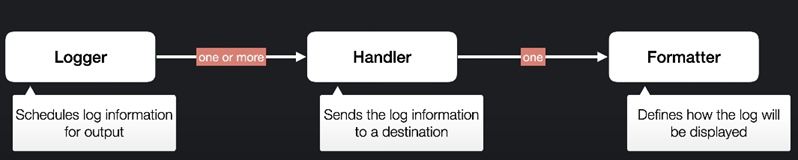

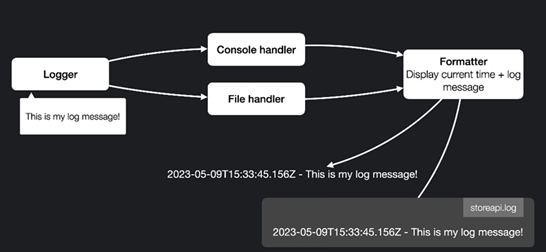

Logging in Python is a mechanism that allows you to record information from your program's execution. It provides a flexible and configurable way to capture messages at different levels of severity and direct them to various outputs, such as the console, files, or even remote servers.

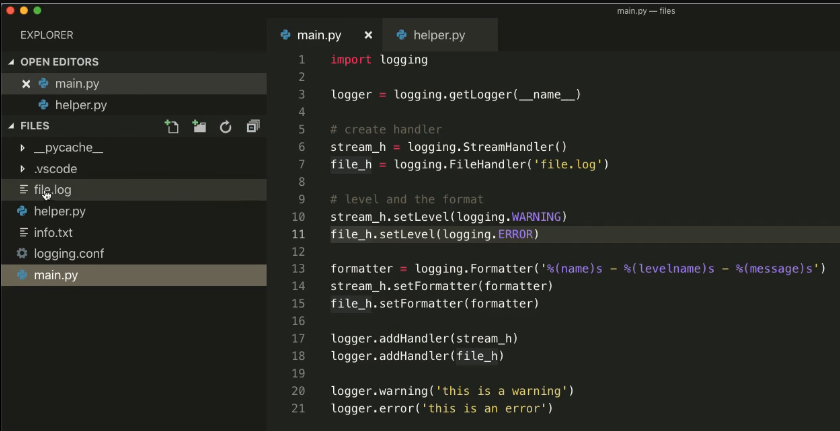

### Python Logging Basics
The basics of using the logging module to record the events in a file are very simple.  For that, simply import the module from the library.  

1. Create and configure the logger. It can have several parameters. But importantly, pass the name of the file in which you want to record the events.


2. Here the format of the logger can also be set. By default, the file works in append mode but we can change that to write mode if required.


3. Also, the level of the logger can be set which acts as the threshold for tracking based on the numeric values assigned to each level. 


4. There are several attributes that can be passed as parameters.


5. The list of all those parameters is given in Python Library. The user can choose the required attribute according to the requirement.
After that, create an object and use the various methods as shown in the example.

The `logging` module is part of the Python Standard Library and provides a comprehensive framework for emitting log messages from applications. Here are some key concepts and components of the logging module:

1. **Logger:**
   - A logger is the main entry point for interacting with the logging module. It is used to emit log messages from different parts of your code.
   - Loggers are identified by their names, which are typically hierarchical, reflecting the structure of your application.

     ```python
     import logging

     logger = logging.getLogger('my_logger')
     ```

2. **Handler:**
   - Handlers determine where the log messages go. They define the output destinations, such as the console, files, sockets, etc.
   - You can add multiple handlers to a logger, allowing log messages to be sent to multiple destinations simultaneously.

     ```python
     console_handler = logging.StreamHandler()
     file_handler = logging.FileHandler('my_log_file.log')

     logger.addHandler(console_handler)
     logger.addHandler(file_handler)
     ```

| Handler                    | Description                                                                                                           |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| `StreamHandler`            | Sends messages to streams (file-like objects).                                                                        |
| `FileHandler`              | Sends messages to disk files.                                                                                         |
| `BaseRotatingHandler`      | Base class for handlers that rotate log files at a certain point. Use `RotatingFileHandler` or `TimedRotatingFileHandler` instead. |
| `RotatingFileHandler`      | Sends messages to disk files, with support for maximum log file sizes and log file rotation.                         |
| `TimedRotatingFileHandler` | Sends messages to disk files, rotating the log file at certain timed intervals.                                       |
| `SocketHandler`            | Sends messages to TCP/IP sockets. Also supports Unix domain sockets since Python 3.4.                                 |
| `DatagramHandler`          | Sends messages to UDP sockets. Also supports Unix domain sockets since Python 3.4.                                   |
| `SMTPHandler`              | Sends messages to a designated email address.                                                                        |
| `SysLogHandler`            | Sends messages to a Unix Syslog the daemon, possibly on a remote machine.                                             |
| `NTEventLogHandler`        | Sends messages to a Windows NT/2000/XP event log.                                                                    |
| `MemoryHandler`            | Sends messages to a buffer in memory, which is flushed whenever specific criteria are met.                           |
| `HTTPHandler`              | Sends messages to an HTTP server using either GET or POST semantics.                                                  |
| `WatchedFileHandler`       | Watches the file it is logging to. If the file changes, it is closed and reopened using the file name.               |
| `QueueHandler`             | Sends messages to a queue, such as those implemented in the `queue` or `multiprocessing` modules.                     |
| `NullHandler`              | Does nothing with error messages. Used by library developers to avoid ‘No handlers could be found for logger’ message. |


3. **Formatter:**
   - Formatters define the layout of the log messages, specifying what information is included in each log entry.
   - You can customize the format of timestamps, log levels, and other details.

     ```python
     formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
     console_handler.setFormatter(formatter)
     file_handler.setFormatter(formatter)
     ```

4. **Log Levels:**
   - Log messages have different severity levels, categorized as follows (in increasing order of severity):<br></br>
   
        1. **`DEBUG:`** Detailed information, typically used for debugging purposes. It provides the most granular level of logging.<br></br>

        2. **`INFO:`** General information about the program's execution. It confirms that things are working as expected.<br></br>

        3. **`WARNING:`** Indicates a potential issue or a situation that might lead to an error in the future, but the program can still continue its execution.<br></br>

        4. **`ERROR:`** Indicates a more severe issue that prevented a specific operation from being completed. It does not necessarily lead to program termination.<br></br>

        5. **`CRITICAL:`** The most severe level. Indicates a critical error that may lead to the termination of the program or a major malfunction. It requires immediate attention.<br></br>

- You can set a threshold level on a logger, and only messages at or above that level will be processed.

     ```python
     logger.setLevel(logging.DEBUG)
    ```

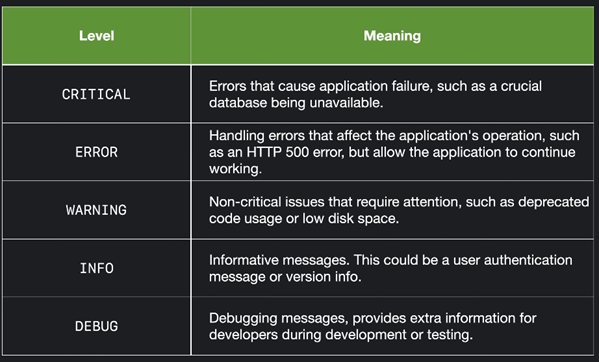

There are several logger objects offered by the base Handler itself.  

- `Logger.info(msg):` This will log a message with level INFO on this logger.


- `Logger.warning(msg):` This will log a message with a level WARNING on this logger.


- `Logger.error(msg):` This will log a message with level ERROR on this logger.


- `Logger.critical(msg):` This will log a message with level CRITICAL on this logger.


- `Logger.log(lvl,msg):` This will Log a message with integer level lvl on this logger.


- `Logger.exception(msg):` This will log a message with level ERROR on this logger.


- `Logger.setLevel(lvl):` This function sets the threshold of this logger to lvl. This means that all the messages below this level will be ignored.


- `Logger.addFilter(filt):` This adds a specific filter fit into this logger.


- `Logger.removeFilter(filt):` This removes a specific filter fit into this logger.


- `Logger.filter(record):` This method applies the logger’s filter to the record provided and returns True if the record is to be processed. Else, it will return False.


- `Logger.addHandler(hdlr):` This adds a specific handler hdlr to this logger.


- `Logger.removeHandler(hdlr) :` This removes a specific handler hdlr into this logger.


- `Logger.hasHandlers():` This checks if the logger has any handler configured or not. 

#### Now, let's see an example of how to use logging in a Python script:

In [1]:
import logging

In [2]:
# Create a logger
logger = logging.getLogger('my_logger')
logger.setLevel(logging.DEBUG)

In [3]:
# Create a console handler and set the level to debug
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)

In [4]:
# Create a formatter and add it to the handler
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

In [5]:
# Add the console handler to the logger
logger.addHandler(console_handler)

In [6]:
# Example usage
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

2024-02-05 15:38:03,478 - DEBUG - This is a debug message
2024-02-05 15:38:03,482 - INFO - This is an info message
2024-02-05 15:38:03,483 - WARNING - This is a warning message
2024-02-05 15:38:03,484 - ERROR - This is an error message
2024-02-05 15:38:03,485 - CRITICAL - This is a critical message


In this example, log messages at the `DEBUG` level and above will be displayed on the console. You can customize the logging configuration to meet the specific needs of your application, including different log levels, output destinations, and formatting options.

### Python Logging Exception :
Raising exceptions during logging can be useful in certain scenarios to indicate exceptional conditions or errors in your application. By raising an exception, you can halt the normal flow of execution and notify the caller or the logging system about the encountered issue.

In [9]:
import logging

logging.basicConfig(level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


def perform_operation(value):
    if value < 0:
        raise ValueError("Invalid value: Value cannot be negative.")
    else:
        # Continue with normal execution
        logging.info("Operation performed successfully.")


try:
    input_value = int(input("Enter a value: "))
    perform_operation(input_value)
except ValueError as ve:
    logging.exception("Exception occurred: %s", str(ve))


Enter a value: 10


2024-02-05 16:34:23,616 - INFO - Operation performed successfully.


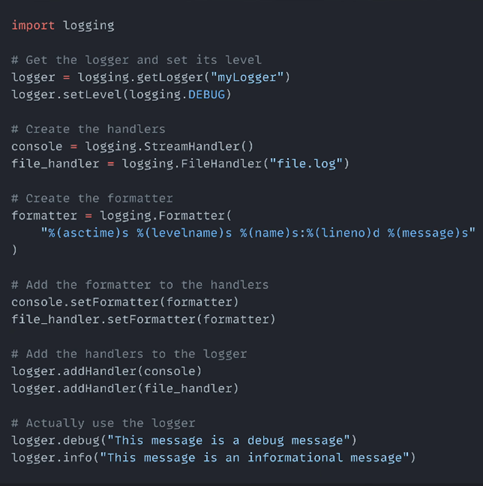

### Logging on ML model

In [ ]:
import logging
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class MachineLearningLogger:
    def __init__(self, log_file_path='ml_log.txt'):
        # Configure logger
        self.logger = logging.getLogger('ml_logger')
        self.logger.setLevel(logging.INFO)

        # Create a file handler and set the level to info
        file_handler = logging.FileHandler(log_file_path)
        file_handler.setLevel(logging.INFO)

        # Create a formatter and add it to the handler
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler.setFormatter(formatter)

        # Add the file handler to the logger
        self.logger.addHandler(file_handler)

    def train_and_evaluate(self, X, y):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize a linear regression model
        model = LinearRegression()

        # Train the model
        self.logger.info('Training the machine learning model...')
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, predictions)
        self.logger.info(f'Mean Squared Error on the test set: {mse}')

        # Additional logging or analysis can be added as needed

if __name__ == "__main__":
    # Example usage
    # Assuming you have a dataset X and corresponding target variable y
    X = np.random.rand(100, 1)  # Replace with your actual dataset
    y = 3 * X.squeeze() + np.random.randn(100)  # Replace with your actual target variable

    # Create an instance of MachineLearningLogger
    ml_logger = MachineLearningLogger()

    # Train and evaluate the machine learning model
    ml_logger.train_and_evaluate(X, y)



In this example, the `MachineLearningLogger` class has a method called `train_and_evaluate` that performs the machine learning tasks, and relevant information is logged using the configured logger. The log messages are saved to a file specified in the constructor (`log_file_path`). Adjust the code according to your specific machine learning algorithm and dataset.

### Using 2 different level of logging in same class:

In [1]:
import logging

In [2]:
class ExampleClass:
    def __init__(self):
        # Create a formatter
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

        # Create a file handler for errors
        error_handler = logging.FileHandler('error_log.txt')
        error_handler.setLevel(logging.ERROR)
        error_handler.setFormatter(formatter)

        # Create a file handler for informational messages
        info_handler = logging.FileHandler('info_log.txt')
        info_handler.setLevel(logging.INFO)
        info_handler.setFormatter(formatter)

        # Create error logger
        self.error_logger = logging.getLogger('ErrorLogger')
        self.error_logger.setLevel(logging.ERROR)
        self.error_logger.addHandler(error_handler)

        # Create info logger
        self.info_logger = logging.getLogger('InfoLogger')
        self.info_logger.setLevel(logging.INFO)
        self.info_logger.addHandler(info_handler)

    def run_pipeline(self):
        try:
            # Your pipeline code here
            self.info_logger.info('Pipeline has started.')
            # ...
            self.info_logger.info('Pipeline has completed successfully.')
        except Exception as e:
            # Log errors using the error logger
            self.error_logger.error(f'Error in pipeline: {str(e)}')

if __name__ == "__main__":
    # Create an instance of ExampleClass
    example_instance = ExampleClass()

    # Run the pipeline, which may generate information or errors
    example_instance.run_pipeline()

In this example, `ExampleClass` has two loggers: `error_logger` and `info_logger`. 


- The `error_logger` is set to log only errors and is connected to a file named 'error_log.txt'. 


- The `info_logger` is set to log informational messages and is connected to a file named 'info_log.txt'. 


- The `run_pipeline` method demonstrates how you might use these loggers within the class, logging information about the pipeline's progress and capturing errors that may occur.

### using \_\_name__ in both loggers:

https://www.youtube.com/watch?v=p3HWzTYUfu8

In [4]:
import logging

# Create a formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Create a file handler for errors
error_handler = logging.FileHandler('error_log.txt')
error_handler.setLevel(logging.ERROR)
error_handler.setFormatter(formatter)

# Create a file handler for informational messages
info_handler = logging.FileHandler('info_log.txt')
info_handler.setLevel(logging.INFO)
info_handler.setFormatter(formatter)

# Create error logger using __name__
error_logger = logging.getLogger(__name__)
error_logger.addHandler(error_handler)
error_logger.setLevel(logging.ERROR)

# Create info logger using __name__
info_logger = logging.getLogger(__name__)
info_logger.addHandler(info_handler)
info_logger.setLevel(logging.INFO)

class ExampleClass:
    @staticmethod
    def run_pipeline():
        try:
            # Your pipeline code here
            info_logger.info('Pipeline has started.')
            # ...
            info_logger.info('Pipeline has completed successfully.')
        except Exception as e:
            # Log errors using the error logger
            error_logger.error(f'Error in pipeline: {str(e)}')

if __name__ == "__main__":
    ExampleClass.run_pipeline()



2024-02-06 00:20:49,418 - __main__ - INFO - Pipeline has started.
2024-02-06 00:20:49,419 - __main__ - INFO - Pipeline has completed successfully.


In this example, both loggers (`error_logger` and `info_logger`) use `__name__` as the logger name. This approach is perfectly valid and might be beneficial in situations where you want to keep the logger names consistent with the module or script names where they are used.